<a href="https://colab.research.google.com/github/SHWETANKD15/Shwetank-DAI-ASSIGNMENT-2/blob/main/DAI_ASSIGNMENT_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm

In [ ]:
# Load the dataset
data = pd.read_csv('tipsdataset.csv')

In [ ]:
print(data.head())
print(data.info())
print(data.describe())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      

In [ ]:
# Check for null values
print(data.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [ ]:
# Convert categorical columns to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

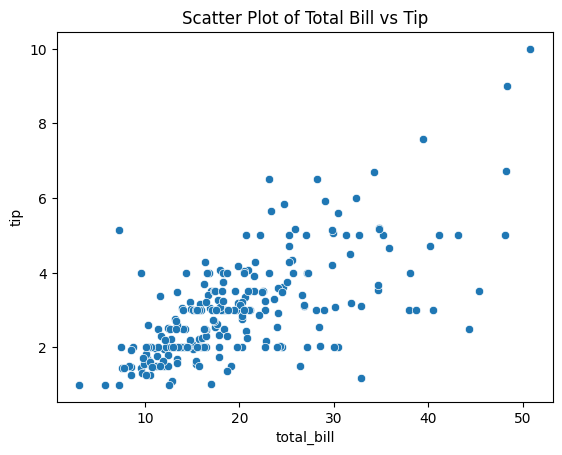

In [ ]:
# Exploratory Data Analysis (EDA)
# Scatter plot
sns.scatterplot(x=data['total_bill'], y=data['tip'])
plt.title("Scatter Plot of Total Bill vs Tip")
plt.show()

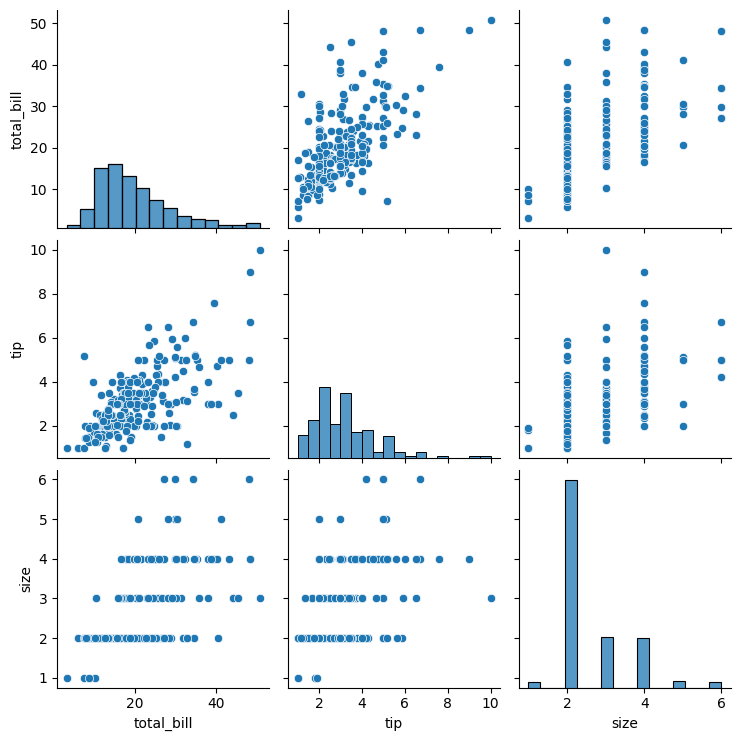

In [ ]:
# Pair Plot
sns.pairplot(data)
plt.show()

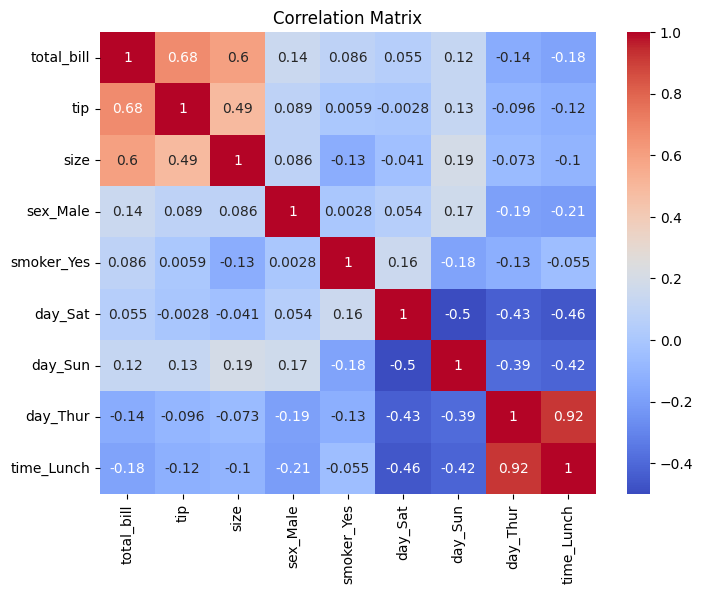

In [ ]:
# Correlation Matrix (Heatmap) using encoded data
plt.figure(figsize=(8,6))
sns.heatmap(data_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Statistical Test for Linearity - Rainbow Test
X = sm.add_constant(data_encoded['total_bill'])
y = data_encoded['tip']
model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print("Rainbow Test Statistic:", rainbow_stat)
print("Rainbow Test p-value:", rainbow_p_value)

Rainbow Test Statistic: 1.2291480226129028
Rainbow Test p-value: 0.1291192152551375


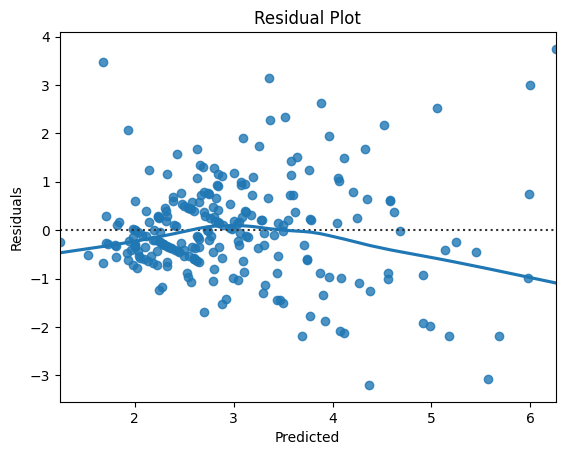

In [ ]:
# Residuals Plot
residuals = y - model.predict(X)
sns.residplot(x=model.predict(X), y=residuals, lowess=True)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title("Residual Plot")
plt.show()

In [ ]:
# Define features and target variable
X = data_encoded.drop('tip', axis=1)
y = data_encoded['tip']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel='linear', C=1.0, epsilon=0.1),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

In [ ]:
# Train and evaluate each model
results = pd.DataFrame(columns=["Model", "RMSE", "R2 Score"])
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Use pd.concat to add a new row to the results DataFrame
    new_row = pd.DataFrame({"Model": [name], "RMSE": [rmse], "R2 Score": [r2]})
    results = pd.concat([results, new_row], ignore_index=True)

# Display results
print(results)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
<ipython-input-24-1b2654bffd2b>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning

                       Model      RMSE  R2 Score
0          Linear Regression  0.838664  0.437302
1           Ridge Regression  0.837107  0.439389
2           Lasso Regression  0.768670  0.527307
3              Decision Tree  1.120354 -0.004178
4              Random Forest  0.958995  0.264246
5  Support Vector Regression  0.807746  0.478025
6        K-Nearest Neighbors  0.936148  0.298886


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Best model insights for management
best_model_name = results.loc[results['R2 Score'].idxmax(), 'Model']
best_model_rmse = results.loc[results['R2 Score'].idxmax(), 'RMSE']
best_model_r2 = results.loc[results['R2 Score'].idxmax(), 'R2 Score']
print(f"Best Model: {best_model_name} with RMSE: {best_model_rmse} and R2 Score: {best_model_r2}")

# Insights
print("\nManagement Insights:")
print("1. Factors with high correlation to tip amounts (check correlation matrix) can be leveraged to understand tipping behavior.")
print("2. The best predictive model (based on R2 score) could be used in a recommendation system or to optimize operations by predicting expected tips.")
print("3. Demographic insights (if available) may help in tailoring services for better customer satisfaction and possibly increasing tip amounts.")

Best Model: Lasso Regression with RMSE: 0.768669542129225 and R2 Score: 0.5273068720881755

Management Insights:
1. Factors with high correlation to tip amounts (check correlation matrix) can be leveraged to understand tipping behavior.
2. The best predictive model (based on R2 score) could be used in a recommendation system or to optimize operations by predicting expected tips.
3. Demographic insights (if available) may help in tailoring services for better customer satisfaction and possibly increasing tip amounts.


code 2


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from scipy import stats

# Load the dataset
df = pd.read_csv('tipsdataset.csv')  # Replace with the actual path




In [ ]:
# Initial Data Exploration
print(df.head())
print(df.info())
print(df.describe())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      

In [ ]:
# Drop any rows with missing values (if any)
df.dropna(inplace=True)

In [ ]:
# Separate features and target variable
X = df.drop(columns=['tip'])  # Replace 'tip' with actual column name for tips if different
y = df['tip']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


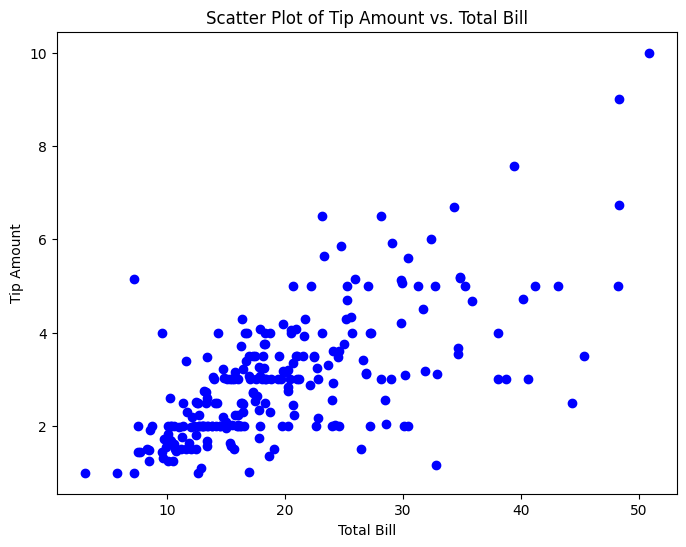

In [ ]:
### Step 1: Check for Linear Trend

# Scatter Plot of Tip vs. Bill Amount
plt.figure(figsize=(8, 6))
plt.scatter(X['total_bill'], y, color='blue')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.title('Scatter Plot of Tip Amount vs. Total Bill')
plt.show()

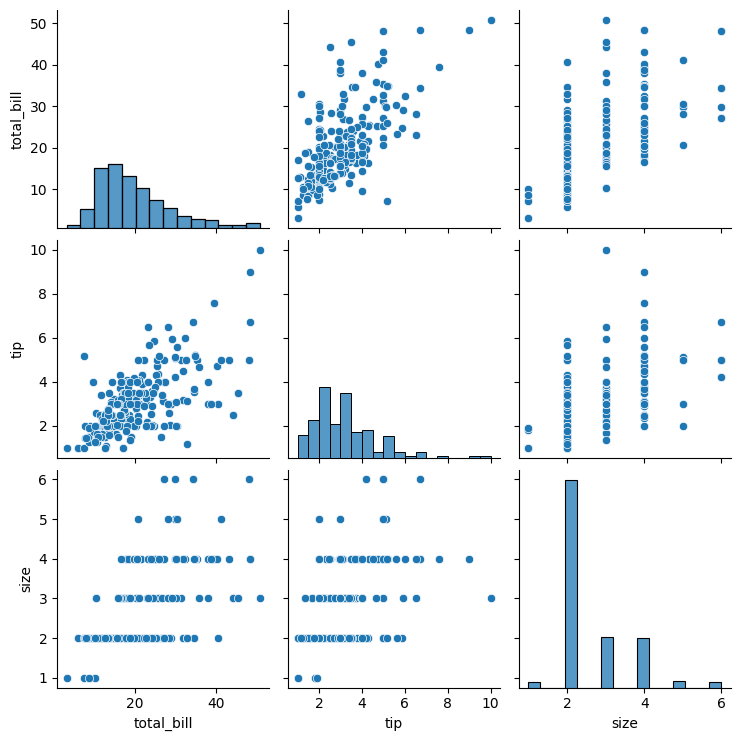

In [ ]:
# Pair Plot for Multiple Features
sns.pairplot(df)
plt.show()

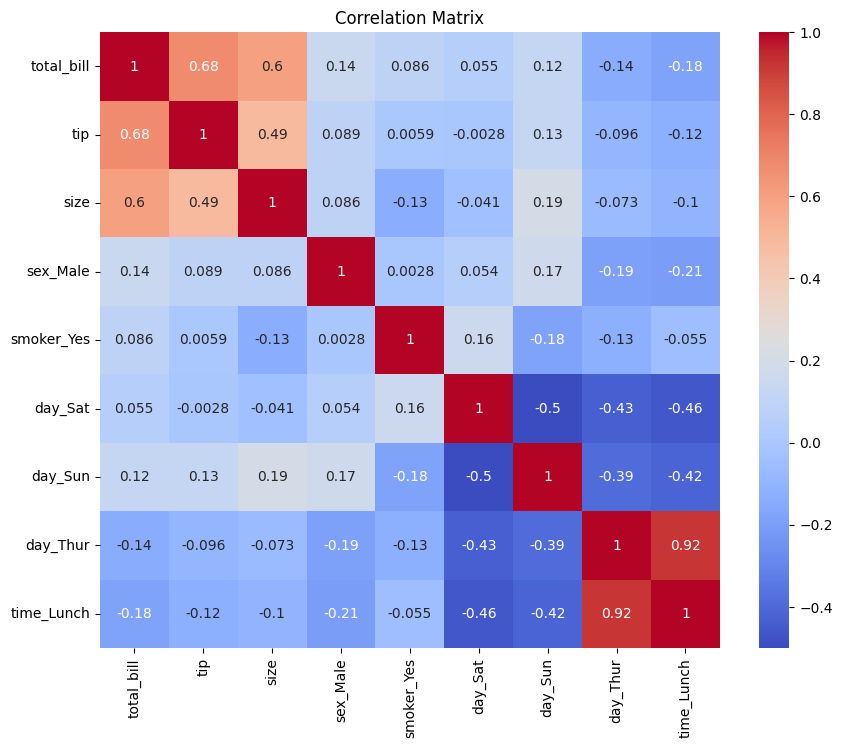

In [ ]:
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first=True avoids multicollinearity

# Correlation Matrix (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined

# Step 1: Apply one-hot encoding to convert categorical variables to dummy variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Step 2: Align columns in X_train and X_test to ensure they have the same features
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Step 3: Fit the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_encoded, y_train)

# Step 4: Make predictions
y_pred_lin = lin_reg.predict(X_test_encoded)

# Step 5: Evaluate the model (assuming evaluate_model function is defined)
evaluate_model(y_test, y_pred_lin, "Linear Regression")

# Alternatively, calculate Mean Squared Error as an example metric
mse = mean_squared_error(y_test, y_pred_lin)
print(f"Mean Squared Error: {mse}")


NameError: name 'evaluate_model' is not defined